# Create Environment

In [1]:
from gym_marbic import *
import copy

In [2]:
steps = 300

## Companies do random actions

In [3]:
env = CorporateBiodiversityEnv(
    grid_size=50,
    n_species=10,
    carrying_capacity=25,
    disturbance=0.0,
    min_age=3,
    max_age=5,
    max_age_sort=False,
    lat_steep=0.1,
    disp_rate=0.45,
    n_corporations=3,
    n_investors=2,
    max_steps=1e6,
    half=True,
    birth_first=True,
    seed=42
)

In [4]:
#get the observation information from reset
base_obs = env.reset()
list_cells_before = [copy.deepcopy(cell) for cell in env.list_cells]
# corporation: [corp.capital, corp.biodiversity_score, corp.resilience, mean_dist, mean_n_ind]
# investor: [cash, portfolio(Nc), corp_capitals(Nc), corp_biodiv(Nc)]

Max age array for each species: [5 3 5 5 3 3 5 4 5 5]
10/10 init species 0 (7679 ind.) 🌲

Before dynamics:


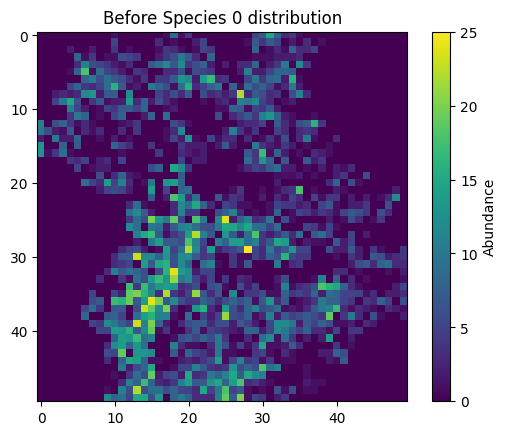

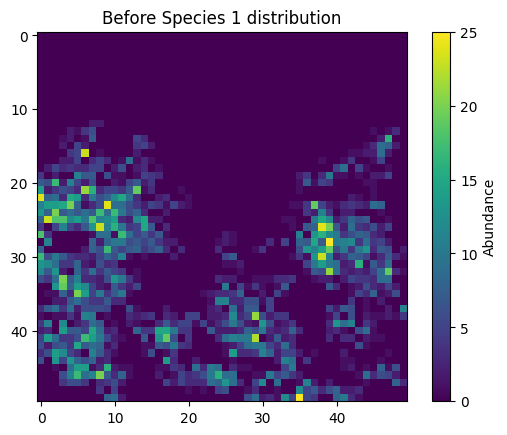

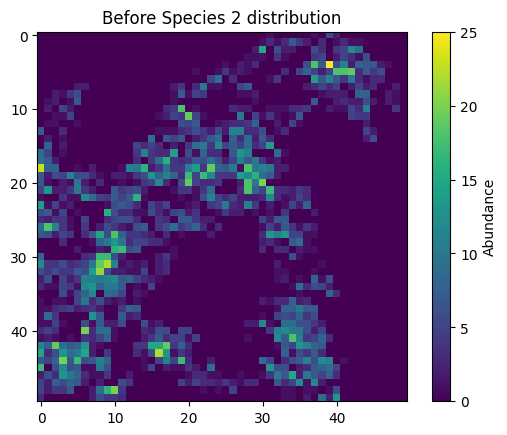

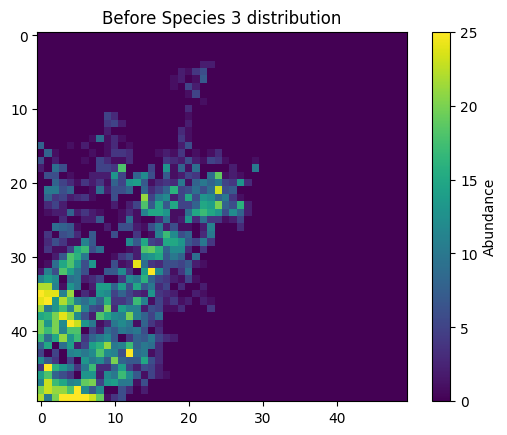

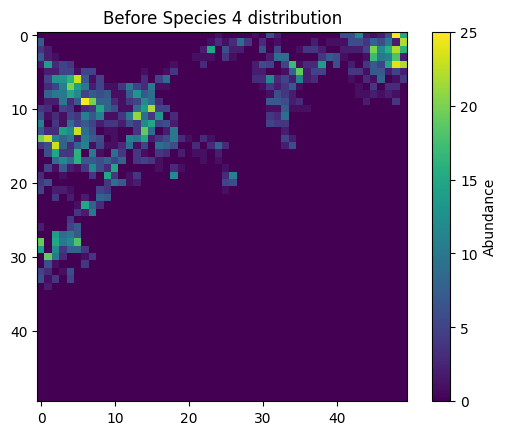

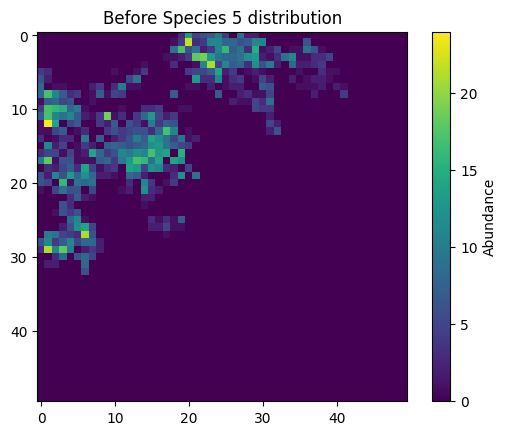

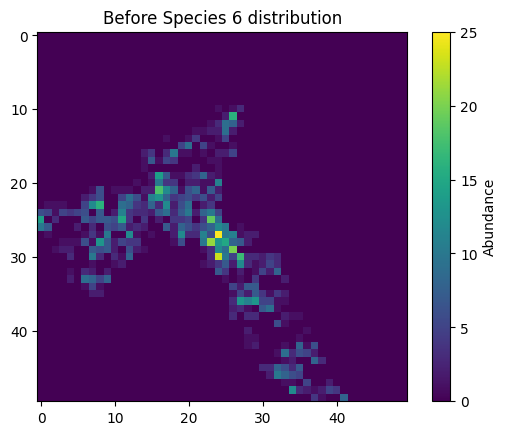

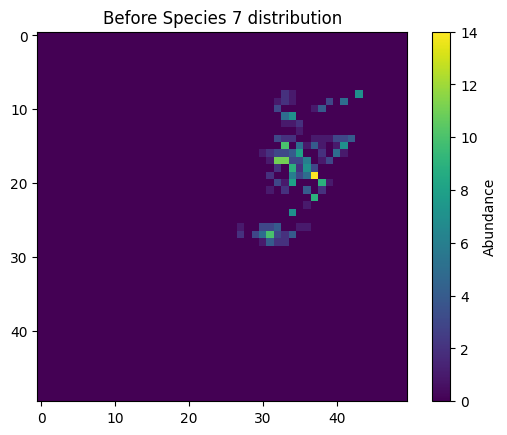

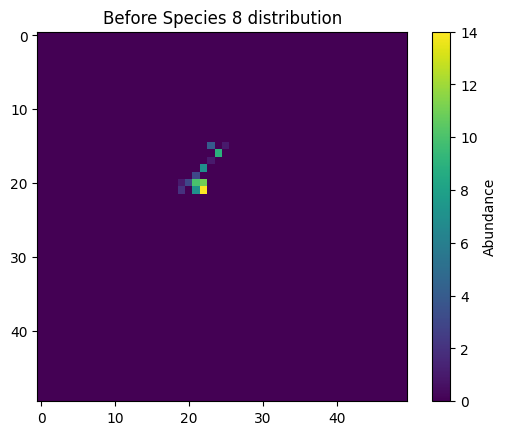

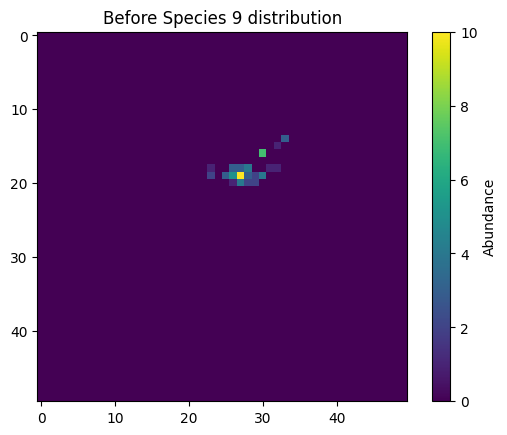

In [5]:
print("Before dynamics:")
for sp_id in range(env.n_species):
    plot_species_distribution(list_cells_before, env.grid_size, sp_id, title_prefix="Before")

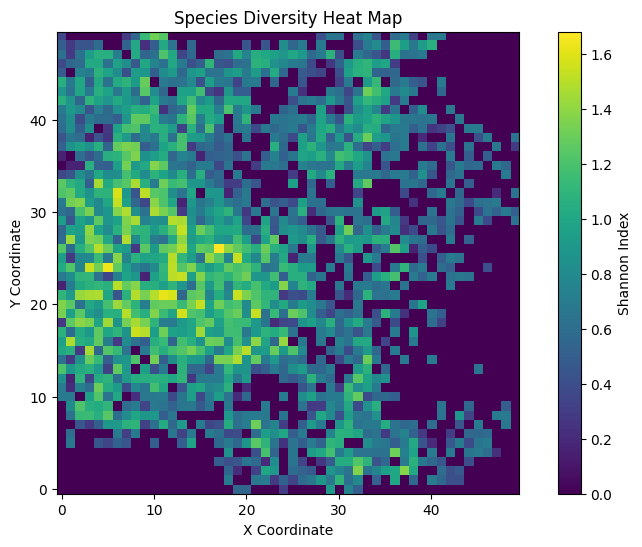

In [6]:
plot_biodiversity_map(list_cells_before)

In [7]:
# check total number of individuals before and after dynamics
# make a copy of the list_cells to compare before and after
print("Before dynamics:")
sum_before = sum(cell.n_individuals for cell in list_cells_before)
print(f"Total individuals: {sum_before}")

Before dynamics:
Total individuals: 31250


[DEBUG] Initial available_space: [25 25 25 ... 25 25 25]
[DEBUG] births count: 31239
Step 1/1000000
Corp 0: capital=145.63, biodiv=0.980, resilience=0.000
Corp 1: capital=158.63, biodiv=0.980, resilience=0.000
Corp 2: capital=116.74, biodiv=1.010, resilience=0.000
Investor 0: cash=100.00, portfolio=[0. 0. 0.]
Investor 1: cash=0.00, portfolio=[0.44627319 0.33630899 0.21741782]
Map mean disturbance: 0.024, max: 30.000
[DEBUG] Initial available_space: [0 0 0 ... 0 0 0]
[DEBUG] births count: 62440
Step 2/1000000
Corp 0: capital=170.63, biodiv=0.960, resilience=0.000
Corp 1: capital=153.63, biodiv=0.990, resilience=0.000
Corp 2: capital=116.74, biodiv=1.010, resilience=0.000
Investor 0: cash=100.00, portfolio=[0. 0. 0.]
Investor 1: cash=0.00, portfolio=[0.43102244 0.36746593 0.20151164]
Map mean disturbance: 0.036, max: 30.000
[DEBUG] Initial available_space: [0 0 0 ... 0 0 0]
[DEBUG] births count: 51660
Step 3/1000000
Corp 0: capital=197.59, biodiv=0.970, resilience=0.000
Corp 1: capital=1

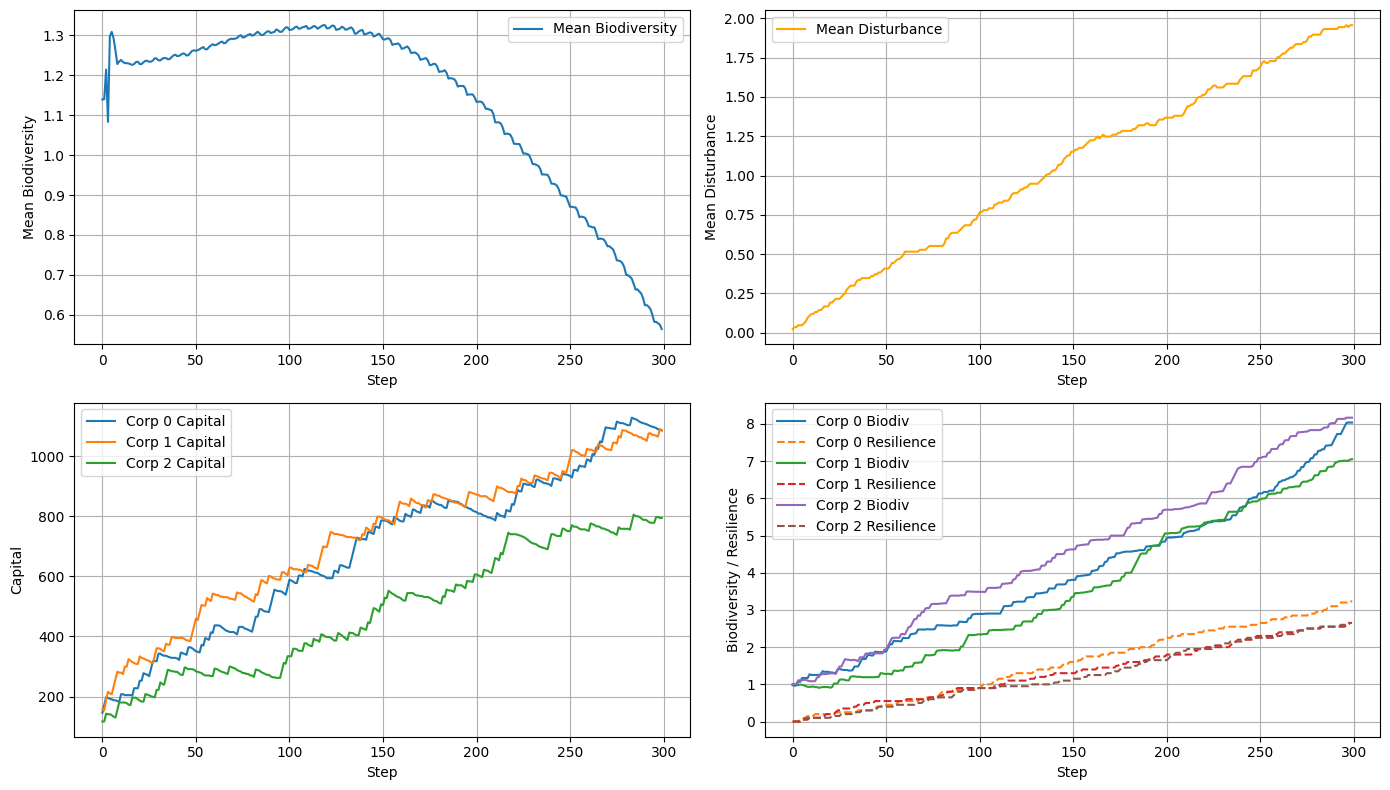

In [8]:
# 记录历史数据
mean_biodiv_history = []
mean_disturbance_history = []

# 新增：公司属性历史
corp_capital_history = [[] for _ in range(env.n_corporations)]
corp_biodiv_history = [[] for _ in range(env.n_corporations)]
corp_resilience_history = [[] for _ in range(env.n_corporations)]

for t in range(steps):
    actions = {}
    for aid in env.agent_ids:
            actions[aid] = env.action_spaces[aid].sample()
            # gym's Dict sample returns e.g. numpy types; convert to python types if needed
            if isinstance(actions[aid], dict) and "weights" in actions[aid]:
                actions[aid]["weights"] = np.array(actions[aid]["weights"], dtype=float)
    obs, rewards, dones, infos = env.step(actions)
    env.render()
    # 记录历史
    mean_biodiv_history.append(env._get_mean_biodiversity())
    mean_disturbance_history.append(env._get_mean_disturbance())
    for i, corp in enumerate(env.corporations):
        corp_capital_history[i].append(corp.capital)
        corp_biodiv_history[i].append(corp.biodiversity_score)
        corp_resilience_history[i].append(corp.resilience)
    if all(dones.values()):
        break

# 绘制趋势图
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
plt.plot(mean_biodiv_history, label="Mean Biodiversity")
plt.xlabel("Step")
plt.ylabel("Mean Biodiversity")
plt.legend()
plt.grid(True)

plt.subplot(2,2,2)
plt.plot(mean_disturbance_history, label="Mean Disturbance", color='orange')
plt.xlabel("Step")
plt.ylabel("Mean Disturbance")
plt.legend()
plt.grid(True)

plt.subplot(2,2,3)
for i in range(env.n_corporations):
    plt.plot(corp_capital_history[i], label=f"Corp {i} Capital")
plt.xlabel("Step")
plt.ylabel("Capital")
plt.legend()
plt.grid(True)

plt.subplot(2,2,4)
for i in range(env.n_corporations):
    plt.plot(corp_biodiv_history[i], label=f"Corp {i} Biodiv")
    plt.plot(corp_resilience_history[i], '--', label=f"Corp {i} Resilience")
plt.xlabel("Step")
plt.ylabel("Biodiversity / Resilience")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

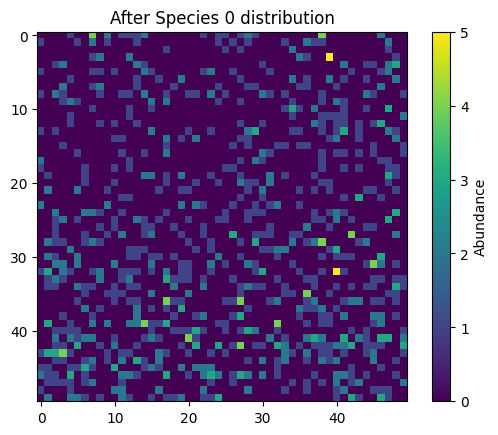

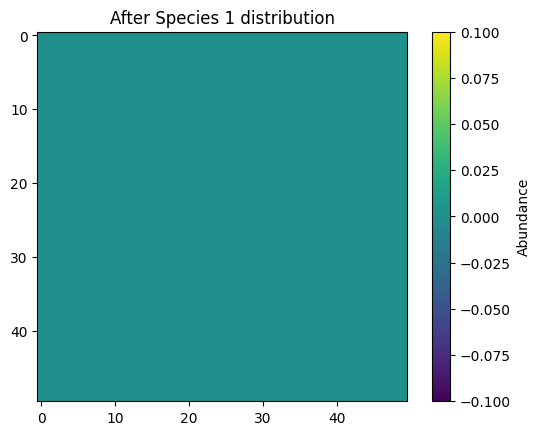

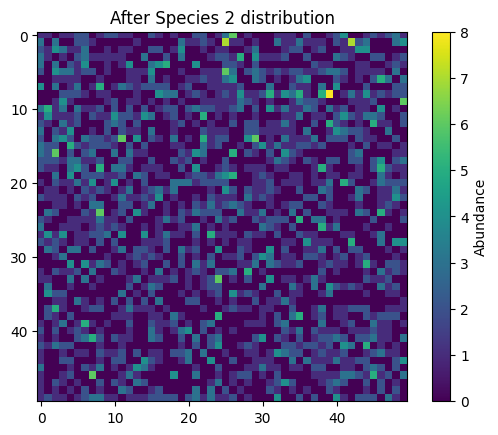

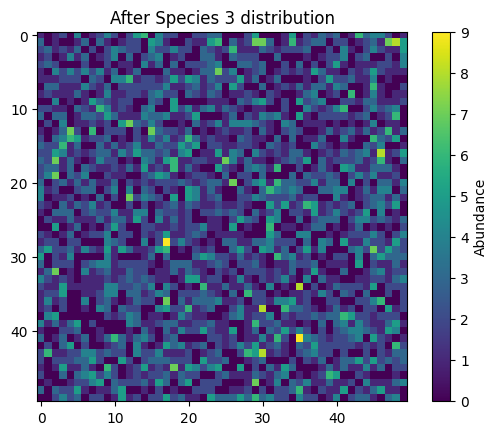

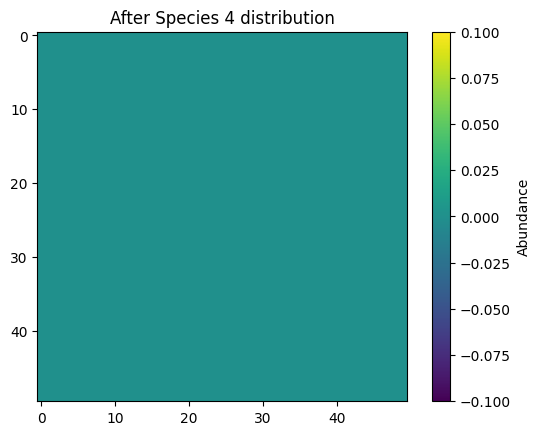

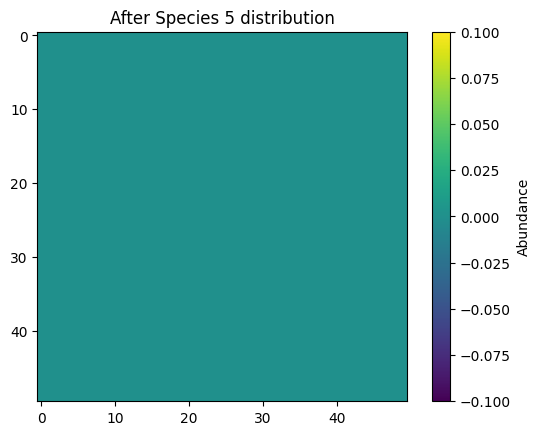

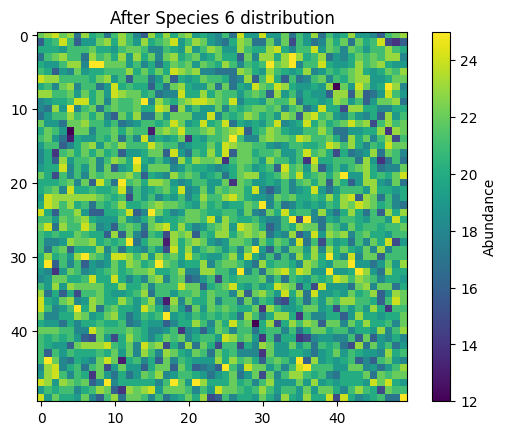

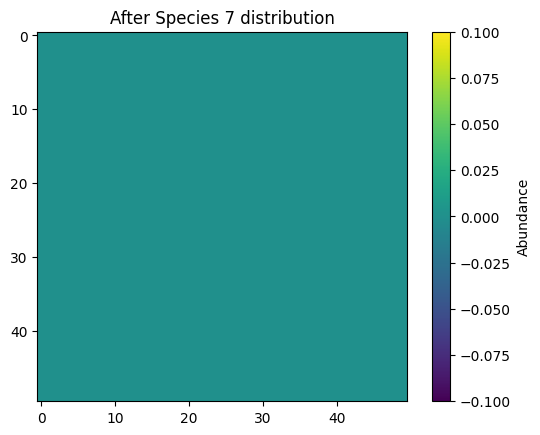

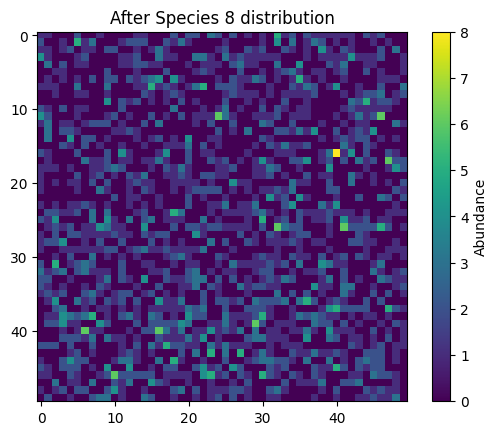

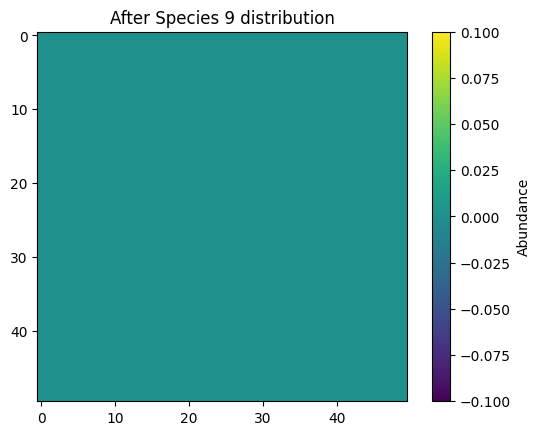

In [9]:
for sp_id in range(env.n_species):
    plot_species_distribution(env.list_cells, env.grid_size, sp_id, title_prefix="After")

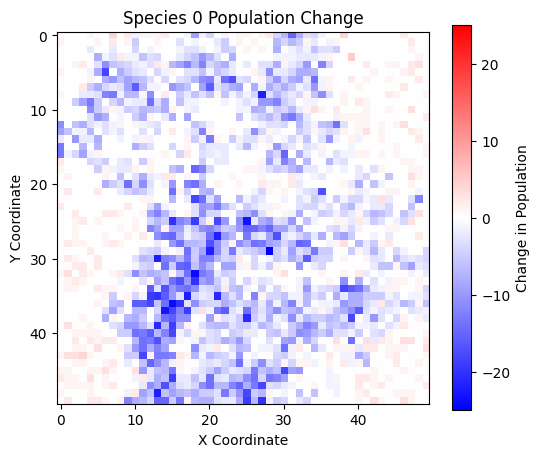

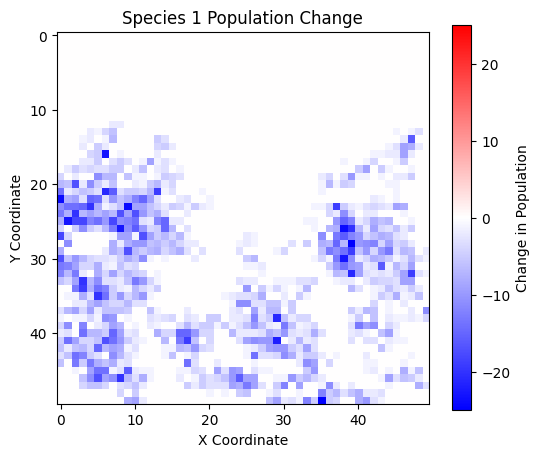

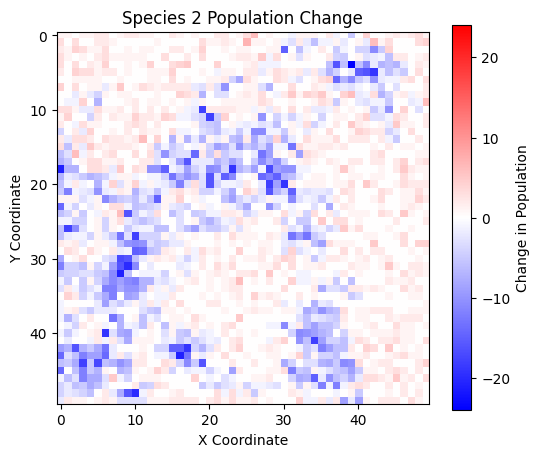

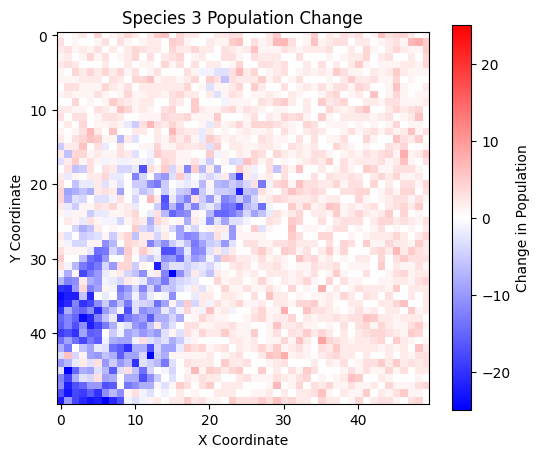

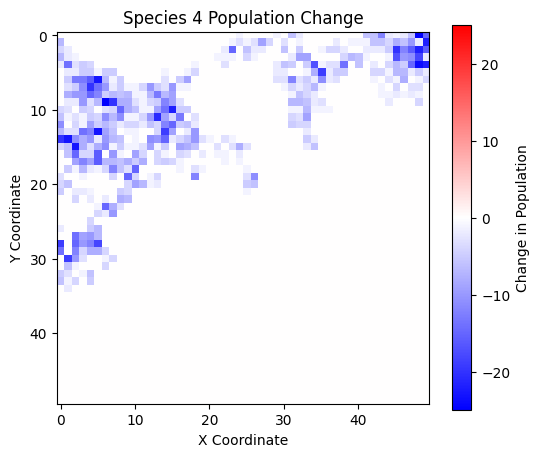

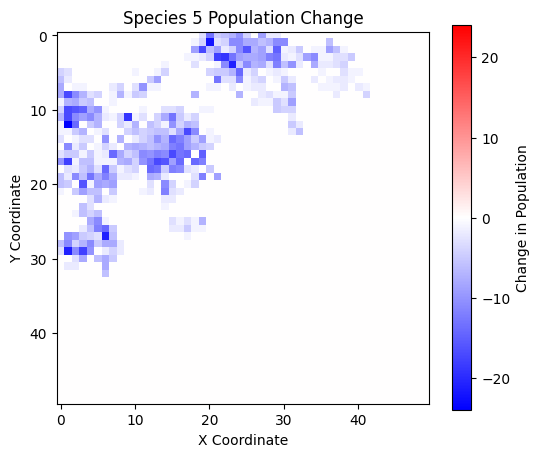

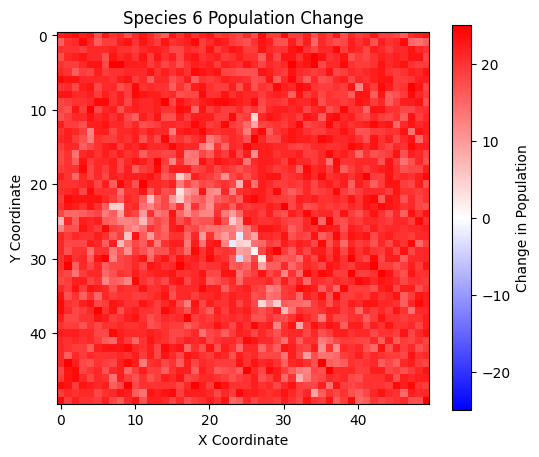

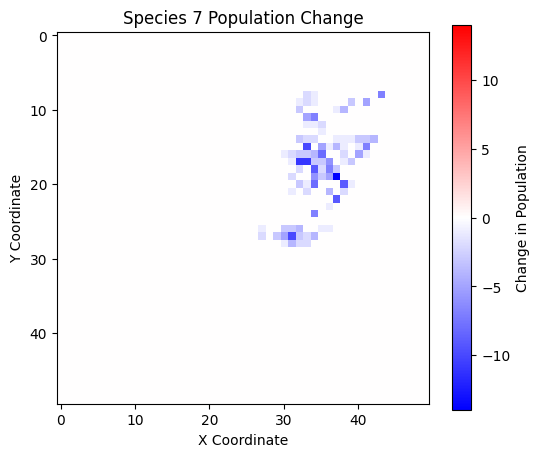

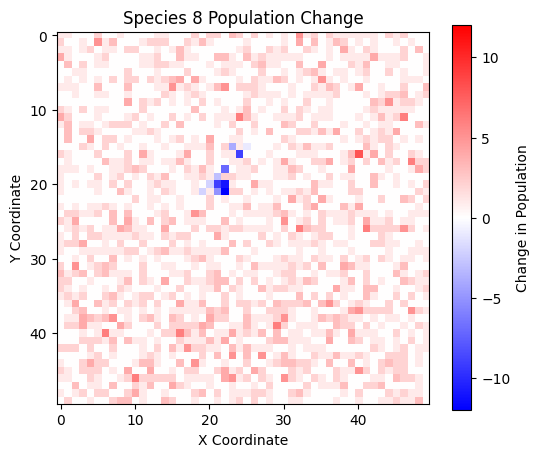

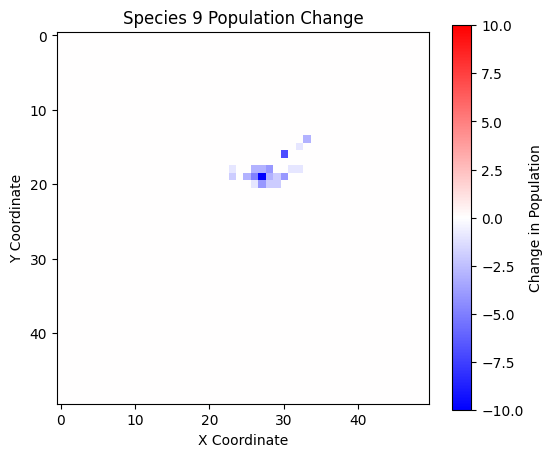

In [10]:
for sp_id in range(env.n_species):
    plot_species_difference(list_cells_before, env.list_cells, species_id=sp_id)

In [11]:
print("\nAfter dynamics:")
#check total number of individuals after dynamics
sum_after = sum(cell.n_individuals for cell in env.list_cells)
print(f"Total individuals: {sum_after}")


After dynamics:
Total individuals: 61789


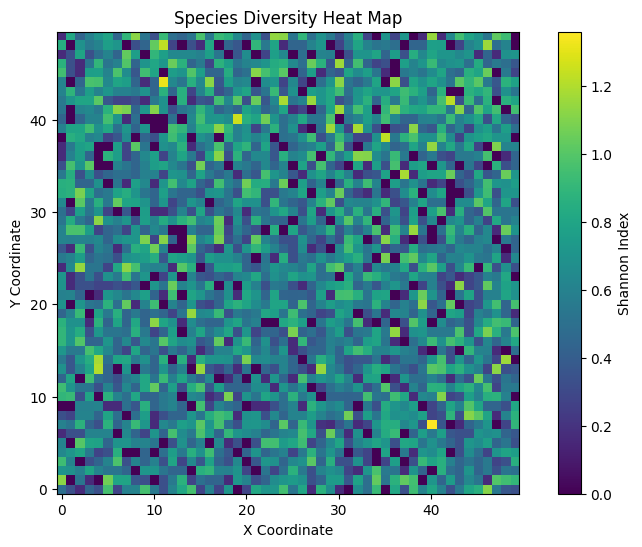

In [12]:
plot_biodiversity_map(env.list_cells)

In [13]:
#check the corporation and investor information
env._get_obs_dict()

{'corp_0': array([1.0855892e+03, 8.0389996e+00, 3.2500000e+00, 1.9560000e+00,
        5.6443554e-01], dtype=float32),
 'corp_1': array([1.0844121e+03, 7.0539999e+00, 2.6500001e+00, 1.9560000e+00,
        5.6443554e-01], dtype=float32),
 'corp_2': array([7.9399866e+02, 8.1689997e+00, 2.6500001e+00, 1.9560000e+00,
        5.6443554e-01], dtype=float32),
 'inv_0': array([0.0000000e+00, 1.9975834e-01, 4.0755051e-01, 3.9269117e-01,
        1.0855892e+03, 1.0844121e+03, 7.9399866e+02, 8.0389996e+00,
        7.0539999e+00, 8.1689997e+00], dtype=float32),
 'inv_1': array([0.0000000e+00, 7.1131450e-01, 8.8167042e-02, 2.0051846e-01,
        1.0855892e+03, 1.0844121e+03, 7.9399866e+02, 8.0389996e+00,
        7.0539999e+00, 8.1689997e+00], dtype=float32)}

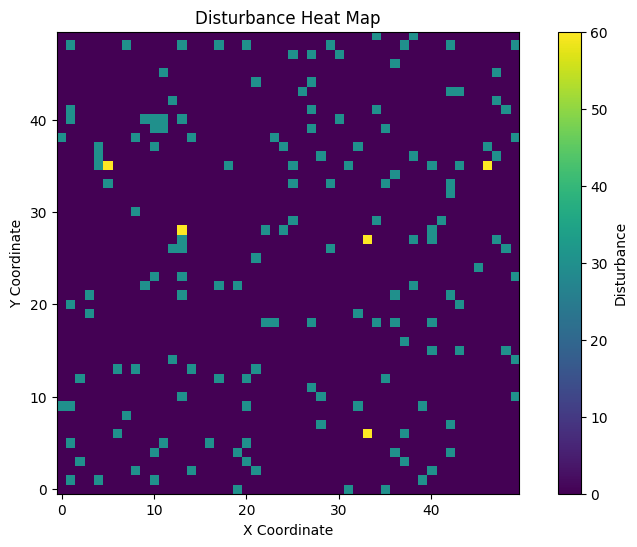

In [14]:
#plot disturbance of each cell in the grid
plot_disturbance_map(env.list_cells)

## Companies do nothing

In [15]:
env = CorporateBiodiversityEnv(
    grid_size=50,
    n_species=10,
    carrying_capacity=25,
    disturbance=0.0,
    min_age=3,
    max_age=5,
    max_age_sort=False,
    lat_steep=0.1,
    disp_rate=0.45,
    n_corporations=3,
    n_investors=2,
    max_steps=1e6,
    half=True,
    birth_first=True,
    seed=42
)

In [16]:
#get the observation information from reset
base_obs = env.reset()
list_cells_before = [copy.deepcopy(cell) for cell in env.list_cells]
# corporation: [corp.capital, corp.biodiversity_score, corp.resilience, mean_dist, mean_n_ind]
# investor: [cash, portfolio(Nc), corp_capitals(Nc), corp_biodiv(Nc)]

Max age array for each species: [5 3 5 5 3 3 5 4 5 5]
10/10 init species 0 (7679 ind.) 🌲

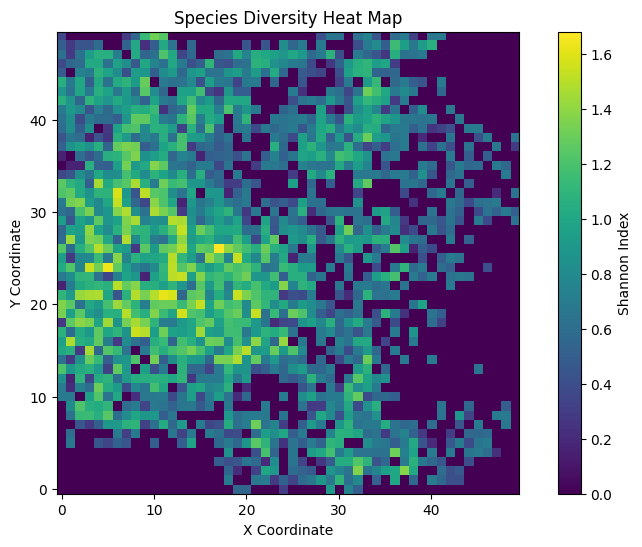

In [17]:
plot_biodiversity_map(list_cells_before)

In [18]:
# check total number of individuals before and after dynamics
# make a copy of the list_cells to compare before and after
print("Before dynamics:")
sum_before = sum(cell.n_individuals for cell in list_cells_before)
print(f"Total individuals: {sum_before}")

Before dynamics:
Total individuals: 31250


[DEBUG] Initial available_space: [25 25 25 ... 25 25 25]
[DEBUG] births count: 31250
Step 1/1000000
Corp 0: capital=100.00, biodiv=1.000, resilience=0.000
Corp 1: capital=100.00, biodiv=1.000, resilience=0.000
Corp 2: capital=100.00, biodiv=1.000, resilience=0.000
Investor 0: cash=100.00, portfolio=[0. 0. 0.]
Investor 1: cash=100.00, portfolio=[0. 0. 0.]
Map mean disturbance: 0.000, max: 0.000
[DEBUG] Initial available_space: [0 0 0 ... 0 0 0]
[DEBUG] births count: 62500
Step 2/1000000
Corp 0: capital=100.00, biodiv=1.000, resilience=0.000
Corp 1: capital=100.00, biodiv=1.000, resilience=0.000
Corp 2: capital=100.00, biodiv=1.000, resilience=0.000
Investor 0: cash=100.00, portfolio=[0. 0. 0.]
Investor 1: cash=100.00, portfolio=[0. 0. 0.]
Map mean disturbance: 0.000, max: 0.000
[DEBUG] Initial available_space: [0 0 0 ... 0 0 0]
[DEBUG] births count: 51702
Step 3/1000000
Corp 0: capital=100.00, biodiv=1.000, resilience=0.000
Corp 1: capital=100.00, biodiv=1.000, resilience=0.000
Corp 2: 

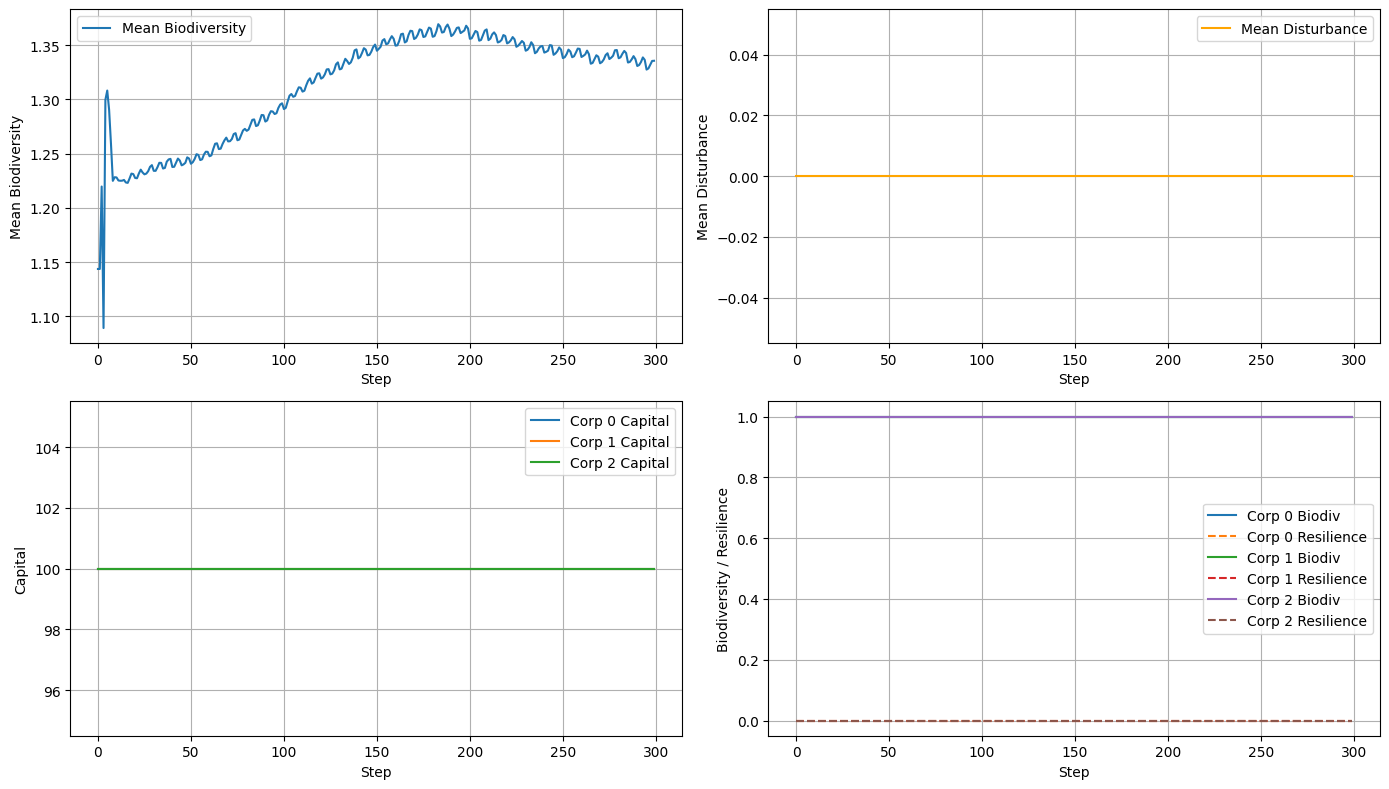

In [19]:
# 记录历史数据
mean_biodiv_history = []
mean_disturbance_history = []

# 新增：公司属性历史
corp_capital_history = [[] for _ in range(env.n_corporations)]
corp_biodiv_history = [[] for _ in range(env.n_corporations)]
corp_resilience_history = [[] for _ in range(env.n_corporations)]

for t in range(steps):
    actions = {}
    for aid in env.corp_ids:
        actions[aid] = {
            "action_type": 0,  # 0代表nothing
            "cell": np.random.randint(env.n_cells)
        }
    for aid in env.inv_ids:
        actions[aid] = {"action_type": 0, "weights": np.zeros(env.n_corporations)}  # 投资者不行动
    obs, rewards, dones, infos = env.step(actions)
    env.render()
    # 记录历史
    mean_biodiv_history.append(env._get_mean_biodiversity())
    mean_disturbance_history.append(env._get_mean_disturbance())
    for i, corp in enumerate(env.corporations):
        corp_capital_history[i].append(corp.capital)
        corp_biodiv_history[i].append(corp.biodiversity_score)
        corp_resilience_history[i].append(corp.resilience)
    if all(dones.values()):
        break

# 绘制趋势图
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
plt.plot(mean_biodiv_history, label="Mean Biodiversity")
plt.xlabel("Step")
plt.ylabel("Mean Biodiversity")
plt.legend()
plt.grid(True)

plt.subplot(2,2,2)
plt.plot(mean_disturbance_history, label="Mean Disturbance", color='orange')
plt.xlabel("Step")
plt.ylabel("Mean Disturbance")
plt.legend()
plt.grid(True)

plt.subplot(2,2,3)
for i in range(env.n_corporations):
    plt.plot(corp_capital_history[i], label=f"Corp {i} Capital")
plt.xlabel("Step")
plt.ylabel("Capital")
plt.legend()
plt.grid(True)

plt.subplot(2,2,4)
for i in range(env.n_corporations):
    plt.plot(corp_biodiv_history[i], label=f"Corp {i} Biodiv")
    plt.plot(corp_resilience_history[i], '--', label=f"Corp {i} Resilience")
plt.xlabel("Step")
plt.ylabel("Biodiversity / Resilience")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [20]:
print("\nAfter dynamics:")
#check total number of individuals after dynamics
sum_after = sum(cell.n_individuals for cell in env.list_cells)
print(f"Total individuals: {sum_after}")


After dynamics:
Total individuals: 62500


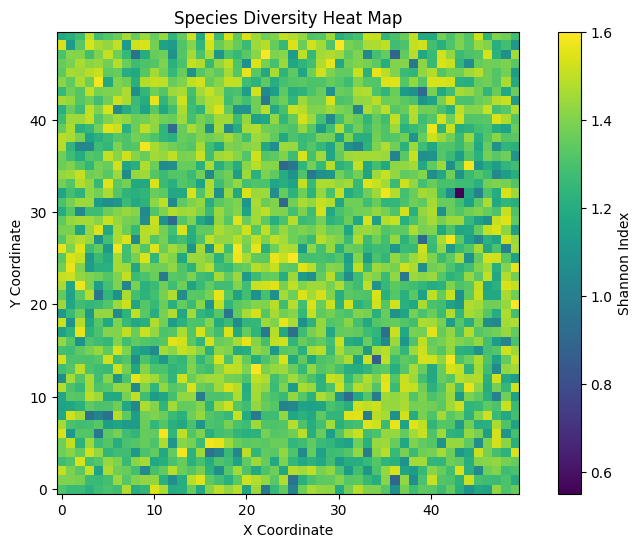

In [21]:
plot_biodiversity_map(env.list_cells)

In [22]:
#check the corporation and investor information
env._get_obs_dict()

{'corp_0': array([100.       ,   1.       ,   0.       ,   0.       ,   1.3356779],
       dtype=float32),
 'corp_1': array([100.       ,   1.       ,   0.       ,   0.       ,   1.3356779],
       dtype=float32),
 'corp_2': array([100.       ,   1.       ,   0.       ,   0.       ,   1.3356779],
       dtype=float32),
 'inv_0': array([100.,   0.,   0.,   0., 100., 100., 100.,   1.,   1.,   1.],
       dtype=float32),
 'inv_1': array([100.,   0.,   0.,   0., 100., 100., 100.,   1.,   1.,   1.],
       dtype=float32)}

## Companies only exploit

In [23]:
env = CorporateBiodiversityEnv(
    grid_size=50,
    n_species=10,
    carrying_capacity=25,
    disturbance=0.0,
    min_age=3,
    max_age=5,
    max_age_sort=False,
    lat_steep=0.1,
    disp_rate=0.45,
    n_corporations=3,
    n_investors=2,
    max_steps=1e6,
    half=True,
    birth_first=True,
    seed=42
)

In [24]:
#get the observation information from reset
base_obs = env.reset()
list_cells_before = [copy.deepcopy(cell) for cell in env.list_cells]
# corporation: [corp.capital, corp.biodiversity_score, corp.resilience, mean_dist, mean_n_ind]
# investor: [cash, portfolio(Nc), corp_capitals(Nc), corp_biodiv(Nc)]

Max age array for each species: [5 3 5 5 3 3 5 4 5 5]
10/10 init species 0 (7679 ind.) 🌲

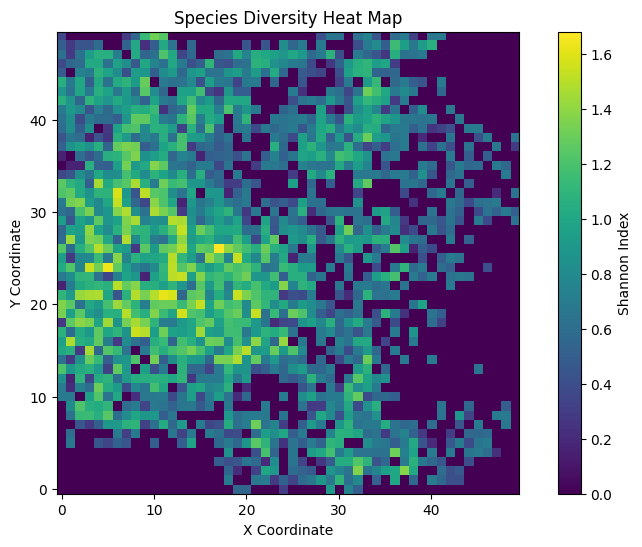

In [25]:
plot_biodiversity_map(list_cells_before)

In [26]:
# check total number of individuals before and after dynamics
# make a copy of the list_cells to compare before and after
print("Before dynamics:")
sum_before = sum(cell.n_individuals for cell in list_cells_before)
print(f"Total individuals: {sum_before}")

Before dynamics:
Total individuals: 31250


[DEBUG] Initial available_space: [25 25 25 ... 25 25 25]
[DEBUG] births count: 31244
Step 1/1000000
Corp 0: capital=104.00, biodiv=0.980, resilience=0.000
Corp 1: capital=100.00, biodiv=0.980, resilience=0.000
Corp 2: capital=111.00, biodiv=0.980, resilience=0.000
Investor 0: cash=100.00, portfolio=[0. 0. 0.]
Investor 1: cash=100.00, portfolio=[0. 0. 0.]
Map mean disturbance: 0.036, max: 30.000
[DEBUG] Initial available_space: [0 0 0 ... 0 0 0]
[DEBUG] births count: 62408
Step 2/1000000
Corp 0: capital=129.00, biodiv=0.960, resilience=0.000
Corp 1: capital=125.00, biodiv=0.960, resilience=0.000
Corp 2: capital=136.00, biodiv=0.960, resilience=0.000
Investor 0: cash=100.00, portfolio=[0. 0. 0.]
Investor 1: cash=100.00, portfolio=[0. 0. 0.]
Map mean disturbance: 0.072, max: 30.000
[DEBUG] Initial available_space: [0 0 0 ... 0 0 0]
[DEBUG] births count: 51599
Step 3/1000000
Corp 0: capital=154.00, biodiv=0.940, resilience=0.000
Corp 1: capital=150.00, biodiv=0.940, resilience=0.000
Corp 2

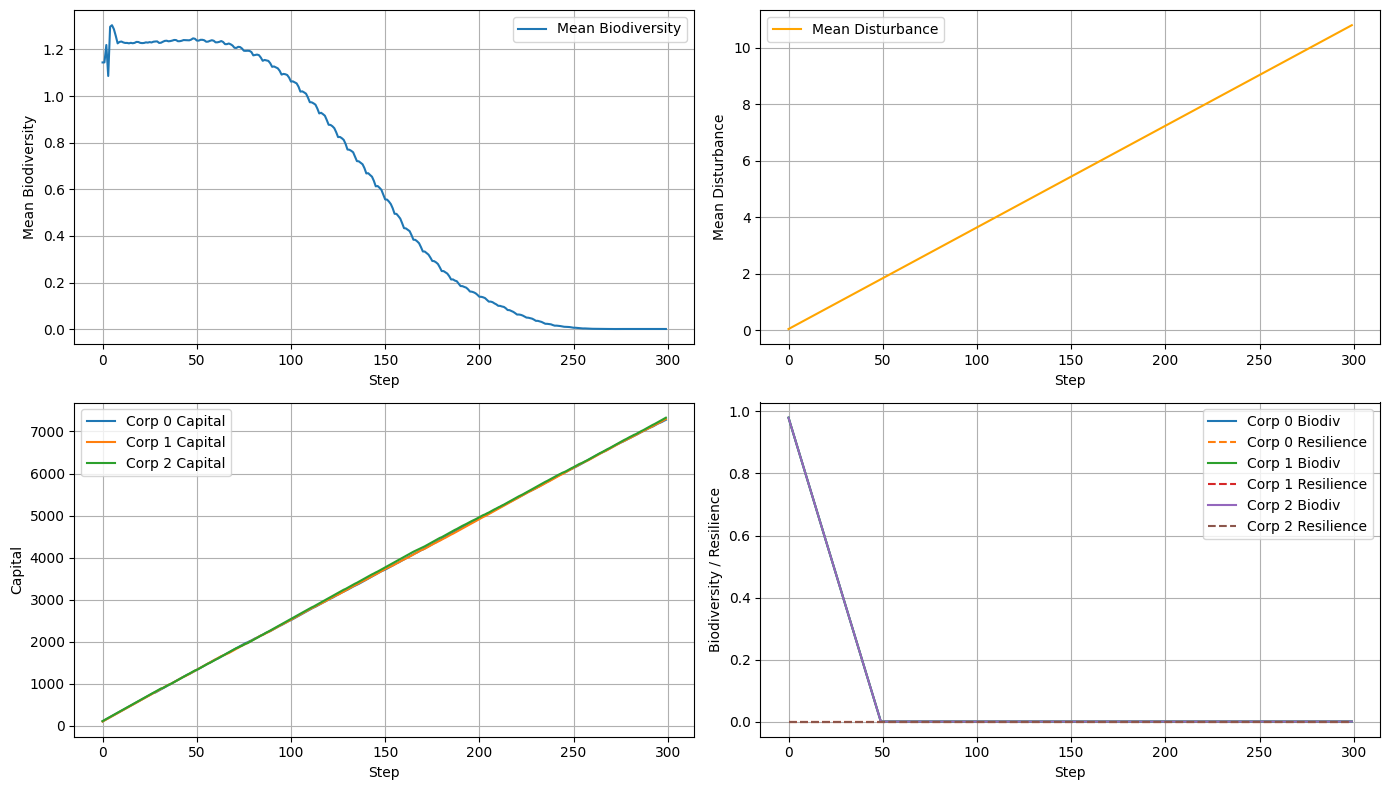

In [27]:
# 记录历史数据
mean_biodiv_history = []
mean_disturbance_history = []

# 新增：公司属性历史
corp_capital_history = [[] for _ in range(env.n_corporations)]
corp_biodiv_history = [[] for _ in range(env.n_corporations)]
corp_resilience_history = [[] for _ in range(env.n_corporations)]

for t in range(steps):
    actions = {}
    for aid in env.corp_ids:
        actions[aid] = {
            "action_type": 1,  # 1代表EXPLOIT
            "cell": np.random.randint(env.n_cells)
        }
    for aid in env.inv_ids:
        actions[aid] = {"action_type": 0, "weights": np.zeros(env.n_corporations)}  # 投资者不行动
    obs, rewards, dones, infos = env.step(actions)
    env.render()
    # 记录历史
    mean_biodiv_history.append(env._get_mean_biodiversity())
    mean_disturbance_history.append(env._get_mean_disturbance())
    for i, corp in enumerate(env.corporations):
        corp_capital_history[i].append(corp.capital)
        corp_biodiv_history[i].append(corp.biodiversity_score)
        corp_resilience_history[i].append(corp.resilience)
    if all(dones.values()):
        break

# 绘制趋势图
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
plt.plot(mean_biodiv_history, label="Mean Biodiversity")
plt.xlabel("Step")
plt.ylabel("Mean Biodiversity")
plt.legend()
plt.grid(True)

plt.subplot(2,2,2)
plt.plot(mean_disturbance_history, label="Mean Disturbance", color='orange')
plt.xlabel("Step")
plt.ylabel("Mean Disturbance")
plt.legend()
plt.grid(True)

plt.subplot(2,2,3)
for i in range(env.n_corporations):
    plt.plot(corp_capital_history[i], label=f"Corp {i} Capital")
plt.xlabel("Step")
plt.ylabel("Capital")
plt.legend()
plt.grid(True)

plt.subplot(2,2,4)
for i in range(env.n_corporations):
    plt.plot(corp_biodiv_history[i], label=f"Corp {i} Biodiv")
    plt.plot(corp_resilience_history[i], '--', label=f"Corp {i} Resilience")
plt.xlabel("Step")
plt.ylabel("Biodiversity / Resilience")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [28]:
print("\nAfter dynamics:")
#check total number of individuals after dynamics
sum_after = sum(cell.n_individuals for cell in env.list_cells)
print(f"Total individuals: {sum_after}")


After dynamics:
Total individuals: 58951


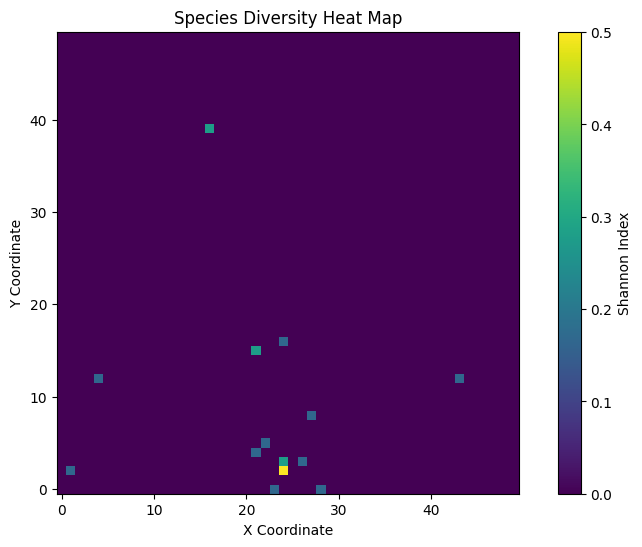

In [29]:
plot_biodiversity_map(env.list_cells)

In [30]:
#check the corporation and investor information
env._get_obs_dict()

{'corp_0': array([7.2760000e+03, 0.0000000e+00, 0.0000000e+00, 1.0800000e+01,
        1.2064608e-03], dtype=float32),
 'corp_1': array([7.2960000e+03, 0.0000000e+00, 0.0000000e+00, 1.0800000e+01,
        1.2064608e-03], dtype=float32),
 'corp_2': array([7.3280000e+03, 0.0000000e+00, 0.0000000e+00, 1.0800000e+01,
        1.2064608e-03], dtype=float32),
 'inv_0': array([ 100.,    0.,    0.,    0., 7276., 7296., 7328.,    0.,    0.,
           0.], dtype=float32),
 'inv_1': array([ 100.,    0.,    0.,    0., 7276., 7296., 7328.,    0.,    0.,
           0.], dtype=float32)}

## Companies only restore

In [31]:
env = CorporateBiodiversityEnv(
    grid_size=50,
    n_species=10,
    carrying_capacity=25,
    disturbance=0.0,
    min_age=3,
    max_age=5,
    max_age_sort=False,
    lat_steep=0.1,
    disp_rate=0.45,
    n_corporations=3,
    n_investors=2,
    max_steps=1e6,
    half=True,
    birth_first=True,
    seed=42
)

In [32]:
#get the observation information from reset
base_obs = env.reset()
list_cells_before = [copy.deepcopy(cell) for cell in env.list_cells]
# corporation: [corp.capital, corp.biodiversity_score, corp.resilience, mean_dist, mean_n_ind]
# investor: [cash, portfolio(Nc), corp_capitals(Nc), corp_biodiv(Nc)]

Max age array for each species: [5 3 5 5 3 3 5 4 5 5]
10/10 init species 0 (7679 ind.) 🌲

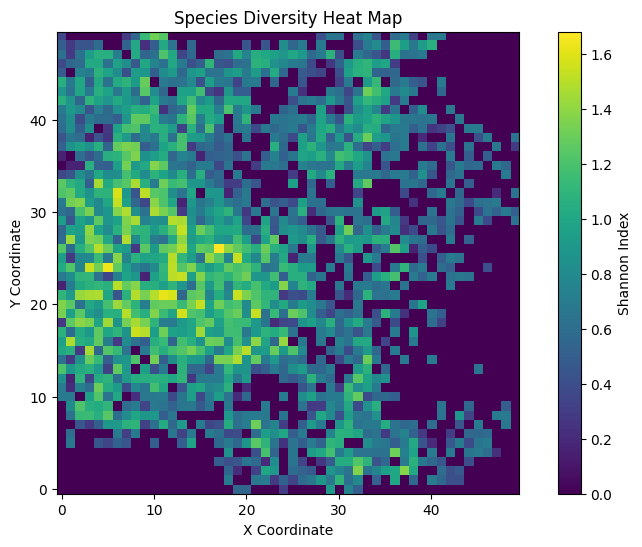

In [33]:
plot_biodiversity_map(list_cells_before)

In [34]:
# check total number of individuals before and after dynamics
# make a copy of the list_cells to compare before and after
print("Before dynamics:")
sum_before = sum(cell.n_individuals for cell in list_cells_before)
print(f"Total individuals: {sum_before}")

Before dynamics:
Total individuals: 31250


[DEBUG] Initial available_space: [25 25 25 ... 25 25 25]
[DEBUG] births count: 31250
Step 1/1000000
Corp 0: capital=95.00, biodiv=1.010, resilience=0.000
Corp 1: capital=95.00, biodiv=1.010, resilience=0.000
Corp 2: capital=95.00, biodiv=1.010, resilience=0.000
Investor 0: cash=100.00, portfolio=[0. 0. 0.]
Investor 1: cash=100.00, portfolio=[0. 0. 0.]
Map mean disturbance: 0.000, max: 0.000
[DEBUG] Initial available_space: [0 0 0 ... 0 0 0]
[DEBUG] births count: 62500
Step 2/1000000
Corp 0: capital=90.00, biodiv=1.020, resilience=0.000
Corp 1: capital=90.00, biodiv=1.020, resilience=0.000
Corp 2: capital=90.00, biodiv=1.020, resilience=0.000
Investor 0: cash=100.00, portfolio=[0. 0. 0.]
Investor 1: cash=100.00, portfolio=[0. 0. 0.]
Map mean disturbance: 0.000, max: 0.000
[DEBUG] Initial available_space: [0 0 0 ... 0 0 0]
[DEBUG] births count: 51702
Step 3/1000000
Corp 0: capital=85.00, biodiv=1.030, resilience=0.000
Corp 1: capital=85.00, biodiv=1.030, resilience=0.000
Corp 2: capital=

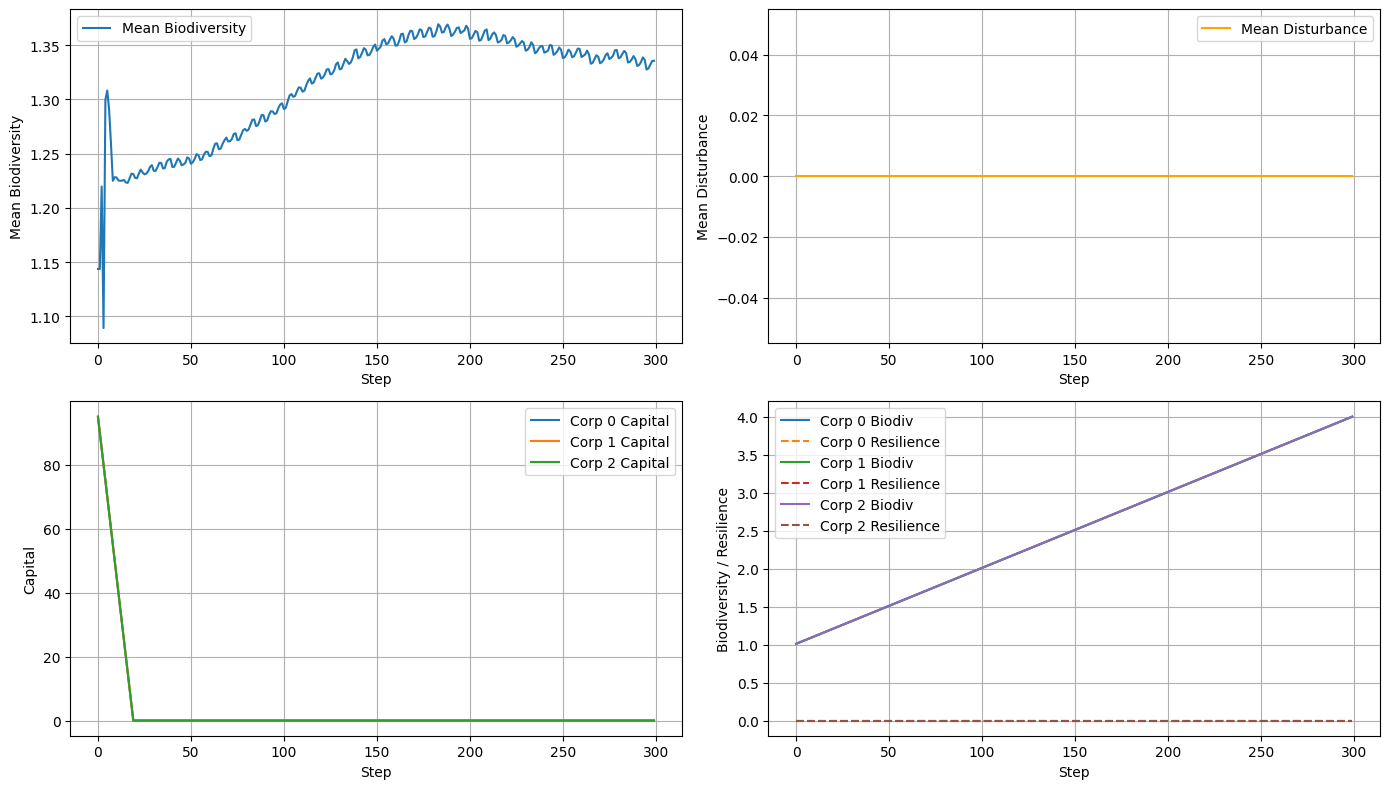

In [35]:
# 记录历史数据
mean_biodiv_history = []
mean_disturbance_history = []

# 新增：公司属性历史
corp_capital_history = [[] for _ in range(env.n_corporations)]
corp_biodiv_history = [[] for _ in range(env.n_corporations)]
corp_resilience_history = [[] for _ in range(env.n_corporations)]

for t in range(steps):
    actions = {}
    for aid in env.corp_ids:
        actions[aid] = {
            "action_type": 2,  # 2代表RESTORE
            "cell": np.random.randint(env.n_cells)
        }
    for aid in env.inv_ids:
        actions[aid] = {"action_type": 0, "weights": np.zeros(env.n_corporations)}  # 投资者不行动
    obs, rewards, dones, infos = env.step(actions)
    env.render()
    # 记录历史
    mean_biodiv_history.append(env._get_mean_biodiversity())
    mean_disturbance_history.append(env._get_mean_disturbance())
    for i, corp in enumerate(env.corporations):
        corp_capital_history[i].append(corp.capital)
        corp_biodiv_history[i].append(corp.biodiversity_score)
        corp_resilience_history[i].append(corp.resilience)
    if all(dones.values()):
        break

# 绘制趋势图
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
plt.plot(mean_biodiv_history, label="Mean Biodiversity")
plt.xlabel("Step")
plt.ylabel("Mean Biodiversity")
plt.legend()
plt.grid(True)

plt.subplot(2,2,2)
plt.plot(mean_disturbance_history, label="Mean Disturbance", color='orange')
plt.xlabel("Step")
plt.ylabel("Mean Disturbance")
plt.legend()
plt.grid(True)

plt.subplot(2,2,3)
for i in range(env.n_corporations):
    plt.plot(corp_capital_history[i], label=f"Corp {i} Capital")
plt.xlabel("Step")
plt.ylabel("Capital")
plt.legend()
plt.grid(True)

plt.subplot(2,2,4)
for i in range(env.n_corporations):
    plt.plot(corp_biodiv_history[i], label=f"Corp {i} Biodiv")
    plt.plot(corp_resilience_history[i], '--', label=f"Corp {i} Resilience")
plt.xlabel("Step")
plt.ylabel("Biodiversity / Resilience")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [36]:
print("\nAfter dynamics:")
#check total number of individuals after dynamics
sum_after = sum(cell.n_individuals for cell in env.list_cells)
print(f"Total individuals: {sum_after}")


After dynamics:
Total individuals: 62500


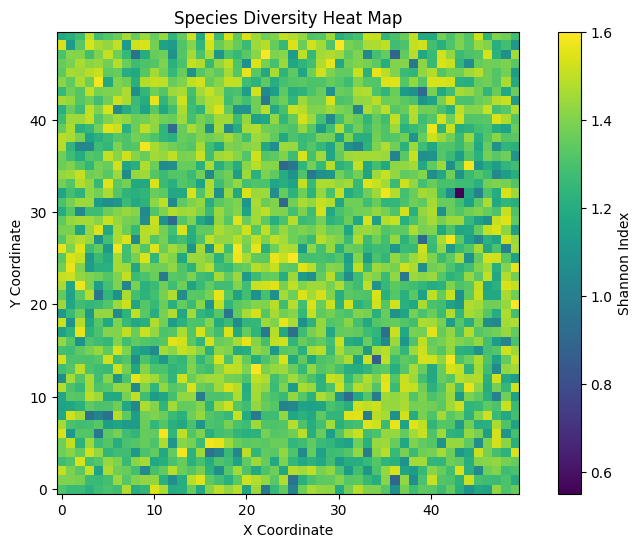

In [37]:
plot_biodiversity_map(env.list_cells)

In [38]:
#check the corporation and investor information
env._get_obs_dict()

{'corp_0': array([0.       , 4.       , 0.       , 0.       , 1.3356779],
       dtype=float32),
 'corp_1': array([0.       , 4.       , 0.       , 0.       , 1.3356779],
       dtype=float32),
 'corp_2': array([0.       , 4.       , 0.       , 0.       , 1.3356779],
       dtype=float32),
 'inv_0': array([100.,   0.,   0.,   0.,   0.,   0.,   0.,   4.,   4.,   4.],
       dtype=float32),
 'inv_1': array([100.,   0.,   0.,   0.,   0.,   0.,   0.,   4.,   4.,   4.],
       dtype=float32)}

## Companies only green wash

In [ ]:
env = CorporateBiodiversityEnv(
    grid_size=50,
    n_species=10,
    carrying_capacity=25,
    disturbance=0.0,
    min_age=3,
    max_age=5,
    max_age_sort=False,
    lat_steep=0.1,
    disp_rate=0.45,
    n_corporations=3,
    n_investors=2,
    max_steps=1e6,
    half=True,
    birth_first=True,
    seed=42
)

In [ ]:
#get the observation information from reset
base_obs = env.reset()
list_cells_before = [copy.deepcopy(cell) for cell in env.list_cells]
# corporation: [corp.capital, corp.biodiversity_score, corp.resilience, mean_dist, mean_n_ind]
# investor: [cash, portfolio(Nc), corp_capitals(Nc), corp_biodiv(Nc)]

Max age array for each species: [5 3 5 5 3 3 5 4 5 5]
10/10 init species 0 (7679 ind.) 🌲

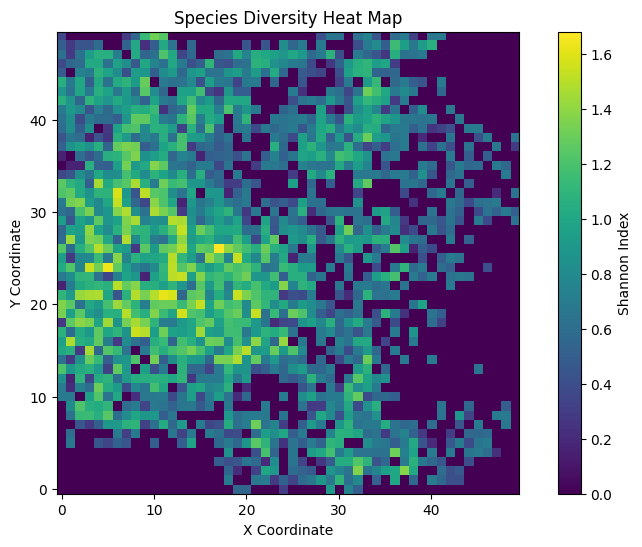

In [ ]:
plot_biodiversity_map(list_cells_before)

In [ ]:
# check total number of individuals before and after dynamics
# make a copy of the list_cells to compare before and after
print("Before dynamics:")
sum_before = sum(cell.n_individuals for cell in list_cells_before)
print(f"Total individuals: {sum_before}")

Before dynamics:
Total individuals: 31250


[DEBUG] Initial available_space: [25 25 25 ... 25 25 25]
[DEBUG] births count: 31250
Step 1/1000000
Corp 0: capital=98.00, biodiv=1.100, resilience=0.000
Corp 1: capital=98.00, biodiv=1.100, resilience=0.000
Corp 2: capital=98.00, biodiv=1.100, resilience=0.000
Investor 0: cash=100.00, portfolio=[0. 0. 0.]
Investor 1: cash=100.00, portfolio=[0. 0. 0.]
Map mean disturbance: 0.000, max: 0.000
[DEBUG] Initial available_space: [0 0 0 ... 0 0 0]
[DEBUG] births count: 62500
Step 2/1000000
Corp 0: capital=96.00, biodiv=1.200, resilience=0.000
Corp 1: capital=96.00, biodiv=1.200, resilience=0.000
Corp 2: capital=96.00, biodiv=1.200, resilience=0.000
Investor 0: cash=100.00, portfolio=[0. 0. 0.]
Investor 1: cash=100.00, portfolio=[0. 0. 0.]
Map mean disturbance: 0.000, max: 0.000
[DEBUG] Initial available_space: [0 0 0 ... 0 0 0]
[DEBUG] births count: 51702
Step 3/1000000
Corp 0: capital=94.00, biodiv=1.300, resilience=0.000
Corp 1: capital=94.00, biodiv=1.300, resilience=0.000
Corp 2: capital=

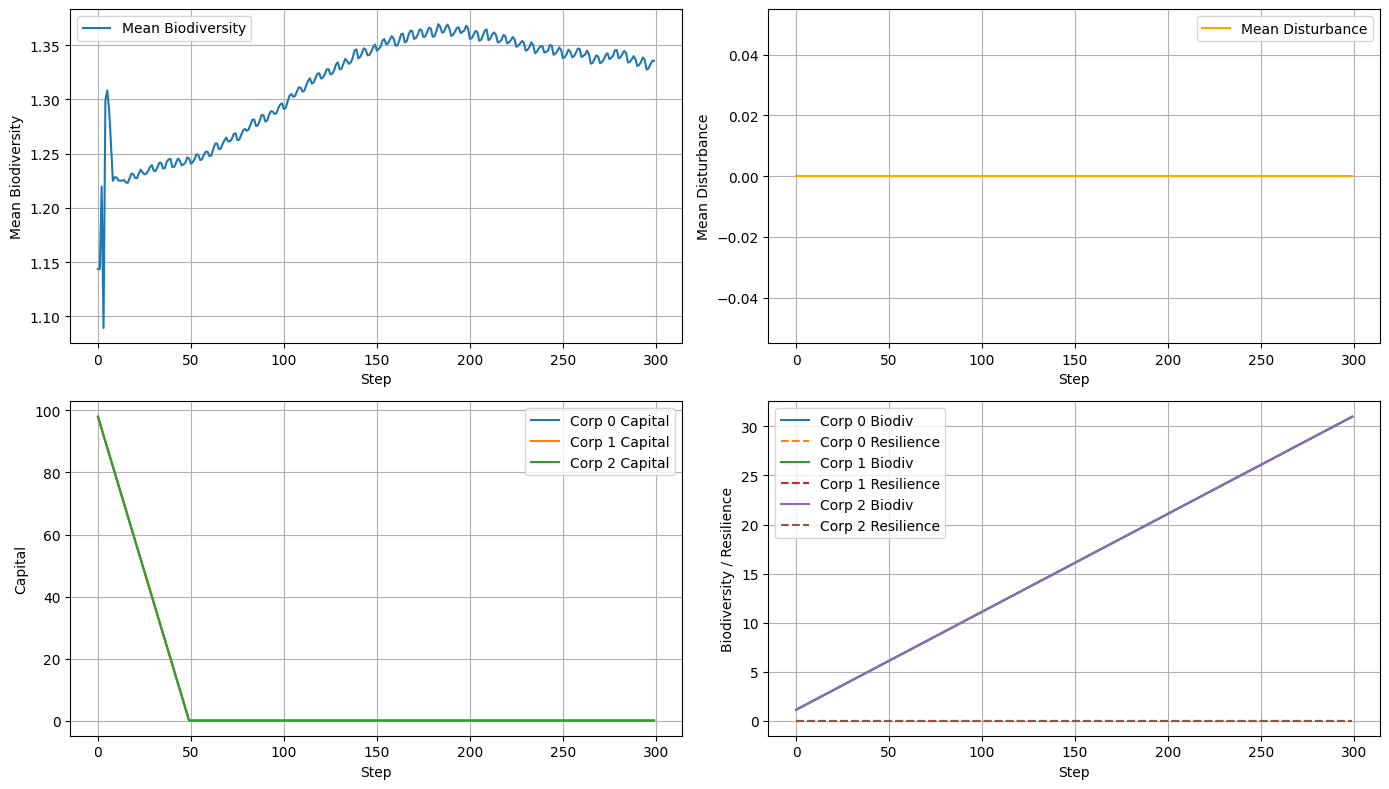

In [ ]:
# 记录历史数据
mean_biodiv_history = []
mean_disturbance_history = []

# 新增：公司属性历史
corp_capital_history = [[] for _ in range(env.n_corporations)]
corp_biodiv_history = [[] for _ in range(env.n_corporations)]
corp_resilience_history = [[] for _ in range(env.n_corporations)]

for t in range(steps):
    actions = {}
    for aid in env.corp_ids:
        if t <= steps // 2:
            actions[aid] = {
                "action_type": 1,  # 1代表EXPLOIT
                "cell": np.random.randint(env.n_cells)
            }
        else:
            actions[aid] = {
                "action_type": 2,  # 2代表RESTORE
                "cell": np.random.randint(env.n_cells)
            }
    for aid in env.inv_ids:
        actions[aid] = {"action_type": 0, "weights": np.zeros(env.n_corporations)}  # 投资者不行动
    obs, rewards, dones, infos = env.step(actions)
    env.render()
    # 记录历史
    mean_biodiv_history.append(env._get_mean_biodiversity())
    mean_disturbance_history.append(env._get_mean_disturbance())
    for i, corp in enumerate(env.corporations):
        corp_capital_history[i].append(corp.capital)
        corp_biodiv_history[i].append(corp.biodiversity_score)
        corp_resilience_history[i].append(corp.resilience)
    if all(dones.values()):
        break

# 绘制趋势图
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
plt.plot(mean_biodiv_history, label="Mean Biodiversity")
plt.xlabel("Step")
plt.ylabel("Mean Biodiversity")
plt.legend()
plt.grid(True)

plt.subplot(2,2,2)
plt.plot(mean_disturbance_history, label="Mean Disturbance", color='orange')
plt.xlabel("Step")
plt.ylabel("Mean Disturbance")
plt.legend()
plt.grid(True)

plt.subplot(2,2,3)
for i in range(env.n_corporations):
    plt.plot(corp_capital_history[i], label=f"Corp {i} Capital")
plt.xlabel("Step")
plt.ylabel("Capital")
plt.legend()
plt.grid(True)

plt.subplot(2,2,4)
for i in range(env.n_corporations):
    plt.plot(corp_biodiv_history[i], label=f"Corp {i} Biodiv")
    plt.plot(corp_resilience_history[i], '--', label=f"Corp {i} Resilience")
plt.xlabel("Step")
plt.ylabel("Biodiversity / Resilience")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
print("\nAfter dynamics:")
#check total number of individuals after dynamics
sum_after = sum(cell.n_individuals for cell in env.list_cells)
print(f"Total individuals: {sum_after}")


After dynamics:
Total individuals: 62500


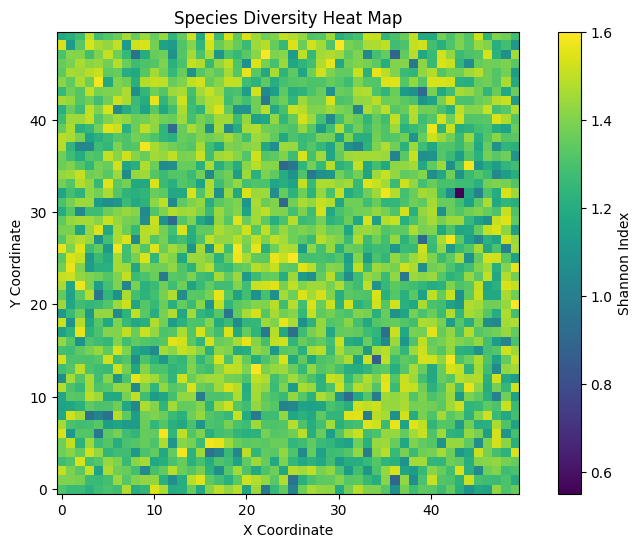

In [ ]:
plot_biodiversity_map(env.list_cells)

In [ ]:
#check the corporation and investor information
env._get_obs_dict()

{'corp_0': array([ 0.       , 31.       ,  0.       ,  0.       ,  1.3356779],
       dtype=float32),
 'corp_1': array([ 0.       , 31.       ,  0.       ,  0.       ,  1.3356779],
       dtype=float32),
 'corp_2': array([ 0.       , 31.       ,  0.       ,  0.       ,  1.3356779],
       dtype=float32),
 'inv_0': array([100.,   0.,   0.,   0.,   0.,   0.,   0.,  31.,  31.,  31.],
       dtype=float32),
 'inv_1': array([100.,   0.,   0.,   0.,   0.,   0.,   0.,  31.,  31.,  31.],
       dtype=float32)}

## Companies exploit then restore

In [55]:
env = CorporateBiodiversityEnv(
    grid_size=50,
    n_species=10,
    carrying_capacity=25,
    disturbance=0.0,
    min_age=3,
    max_age=5,
    max_age_sort=False,
    lat_steep=0.1,
    disp_rate=0.45,
    n_corporations=3,
    n_investors=2,
    max_steps=1e6,
    half=True,
    birth_first=True,
    seed=42
)

In [56]:
#get the observation information from reset
base_obs = env.reset()
list_cells_before = [copy.deepcopy(cell) for cell in env.list_cells]
# corporation: [corp.capital, corp.biodiversity_score, corp.resilience, mean_dist, mean_n_ind]
# investor: [cash, portfolio(Nc), corp_capitals(Nc), corp_biodiv(Nc)]

Max age array for each species: [5 3 5 5 3 3 5 4 5 5]
10/10 init species 0 (7679 ind.) 🌲

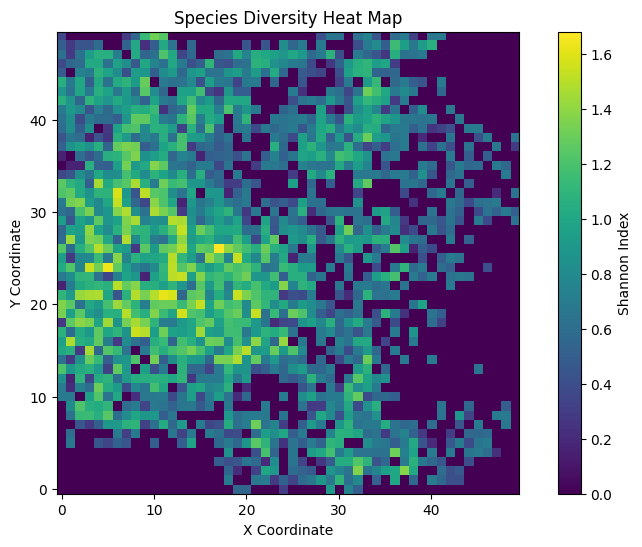

In [57]:
plot_biodiversity_map(list_cells_before)

In [58]:
# check total number of individuals before and after dynamics
# make a copy of the list_cells to compare before and after
print("Before dynamics:")
sum_before = sum(cell.n_individuals for cell in list_cells_before)
print(f"Total individuals: {sum_before}")

Before dynamics:
Total individuals: 31250


[DEBUG] Initial available_space: [25 25 25 ... 25 25 25]
[DEBUG] births count: 31244
Step 1/1000000
Corp 0: capital=104.00, biodiv=0.980, resilience=0.000
Corp 1: capital=100.00, biodiv=0.980, resilience=0.000
Corp 2: capital=111.00, biodiv=0.980, resilience=0.000
Investor 0: cash=100.00, portfolio=[0. 0. 0.]
Investor 1: cash=100.00, portfolio=[0. 0. 0.]
Map mean disturbance: 0.036, max: 30.000
[DEBUG] Initial available_space: [0 0 0 ... 0 0 0]
[DEBUG] births count: 62408
Step 2/1000000
Corp 0: capital=129.00, biodiv=0.960, resilience=0.000
Corp 1: capital=125.00, biodiv=0.960, resilience=0.000
Corp 2: capital=136.00, biodiv=0.960, resilience=0.000
Investor 0: cash=100.00, portfolio=[0. 0. 0.]
Investor 1: cash=100.00, portfolio=[0. 0. 0.]
Map mean disturbance: 0.072, max: 30.000
[DEBUG] Initial available_space: [0 0 0 ... 0 0 0]
[DEBUG] births count: 51599
Step 3/1000000
Corp 0: capital=154.00, biodiv=0.940, resilience=0.000
Corp 1: capital=150.00, biodiv=0.940, resilience=0.000
Corp 2

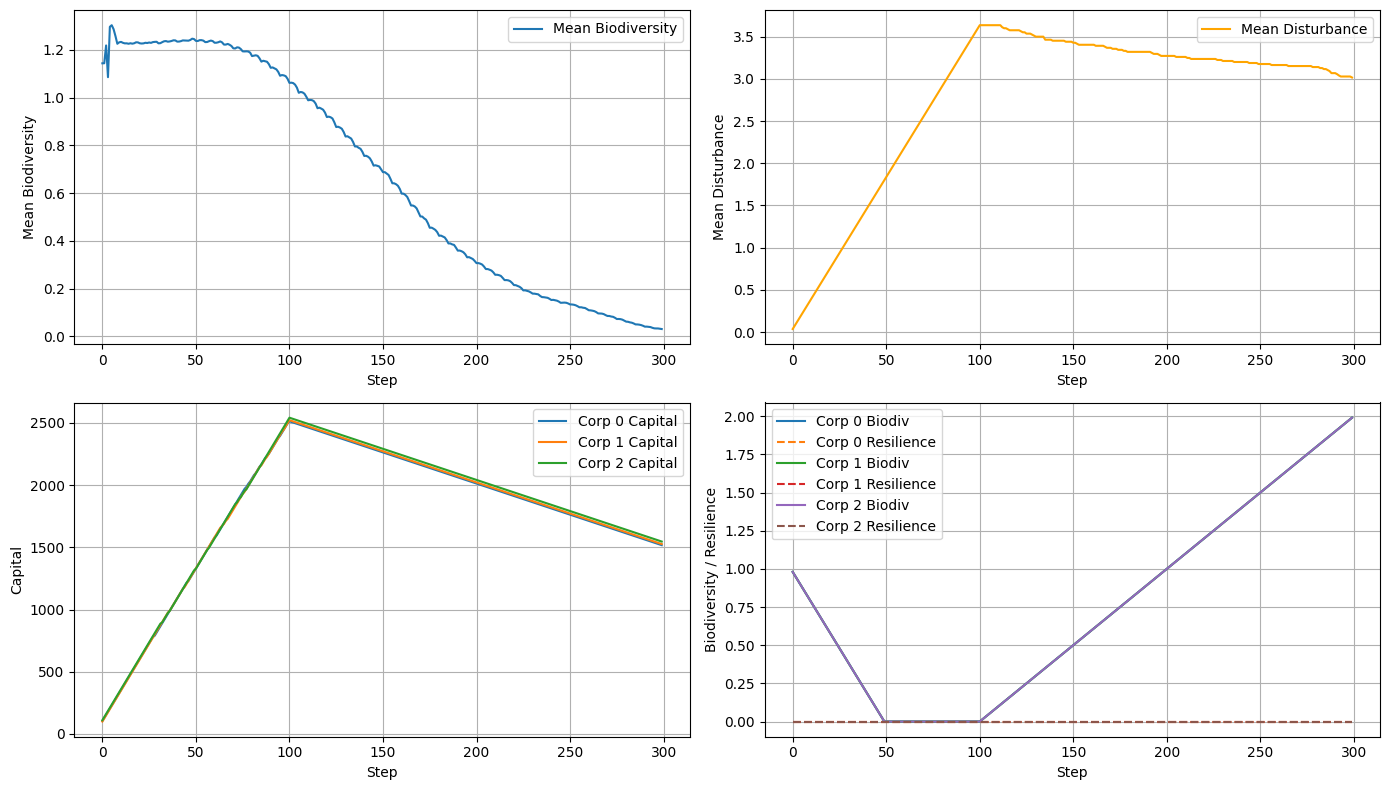

In [59]:
# 记录历史数据
mean_biodiv_history = []
mean_disturbance_history = []

# 新增：公司属性历史
corp_capital_history = [[] for _ in range(env.n_corporations)]
corp_biodiv_history = [[] for _ in range(env.n_corporations)]
corp_resilience_history = [[] for _ in range(env.n_corporations)]

for t in range(steps):
    actions = {}
    for aid in env.corp_ids:
        if t <= steps // 3:
            actions[aid] = {
                "action_type": 1,  # 1代表EXPLOIT
                "cell": np.random.randint(env.n_cells)
            }
        else:
            actions[aid] = {
                "action_type": 2,  # 2代表RESTORE
                "cell": np.random.randint(env.n_cells)
            }
    for aid in env.inv_ids:
        actions[aid] = {"action_type": 0, "weights": np.zeros(env.n_corporations)}  # 投资者不行动
    obs, rewards, dones, infos = env.step(actions)
    env.render()
    # 记录历史
    mean_biodiv_history.append(env._get_mean_biodiversity())
    mean_disturbance_history.append(env._get_mean_disturbance())
    for i, corp in enumerate(env.corporations):
        corp_capital_history[i].append(corp.capital)
        corp_biodiv_history[i].append(corp.biodiversity_score)
        corp_resilience_history[i].append(corp.resilience)
    if all(dones.values()):
        break

# 绘制趋势图
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
plt.plot(mean_biodiv_history, label="Mean Biodiversity")
plt.xlabel("Step")
plt.ylabel("Mean Biodiversity")
plt.legend()
plt.grid(True)

plt.subplot(2,2,2)
plt.plot(mean_disturbance_history, label="Mean Disturbance", color='orange')
plt.xlabel("Step")
plt.ylabel("Mean Disturbance")
plt.legend()
plt.grid(True)

plt.subplot(2,2,3)
for i in range(env.n_corporations):
    plt.plot(corp_capital_history[i], label=f"Corp {i} Capital")
plt.xlabel("Step")
plt.ylabel("Capital")
plt.legend()
plt.grid(True)

plt.subplot(2,2,4)
for i in range(env.n_corporations):
    plt.plot(corp_biodiv_history[i], label=f"Corp {i} Biodiv")
    plt.plot(corp_resilience_history[i], '--', label=f"Corp {i} Resilience")
plt.xlabel("Step")
plt.ylabel("Biodiversity / Resilience")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [60]:
print("\nAfter dynamics:")
#check total number of individuals after dynamics
sum_after = sum(cell.n_individuals for cell in env.list_cells)
print(f"Total individuals: {sum_after}")


After dynamics:
Total individuals: 61497


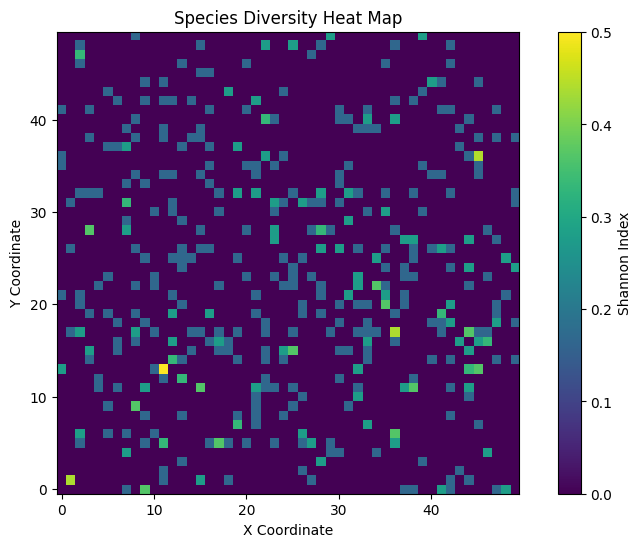

In [61]:
plot_biodiversity_map(env.list_cells)

In [62]:
#check the corporation and investor information
env._get_obs_dict()

{'corp_0': array([1.5170000e+03, 1.9900000e+00, 0.0000000e+00, 3.0160000e+00,
        3.0912207e-02], dtype=float32),
 'corp_1': array([1.5260000e+03, 1.9900000e+00, 0.0000000e+00, 3.0160000e+00,
        3.0912207e-02], dtype=float32),
 'corp_2': array([1.5460000e+03, 1.9900000e+00, 0.0000000e+00, 3.0160000e+00,
        3.0912207e-02], dtype=float32),
 'inv_0': array([ 100.  ,    0.  ,    0.  ,    0.  , 1517.  , 1526.  , 1546.  ,
           1.99,    1.99,    1.99], dtype=float32),
 'inv_1': array([ 100.  ,    0.  ,    0.  ,    0.  , 1517.  , 1526.  , 1546.  ,
           1.99,    1.99,    1.99], dtype=float32)}